### Logistic Regression (One feature)

In [1]:
import numpy as np 
from scipy import stats
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 

&emsp; ***Exploring the sigmoid function***

The sigmoid function is used in logistic regression to map the output of a linear equation $\textrm{sigm}(\beta_0 + \beta_1 x)$ to a probability value between 0 and 1. It ensures that the model predicts probabilities instead of raw values, making it suitable for binary classification tasks.

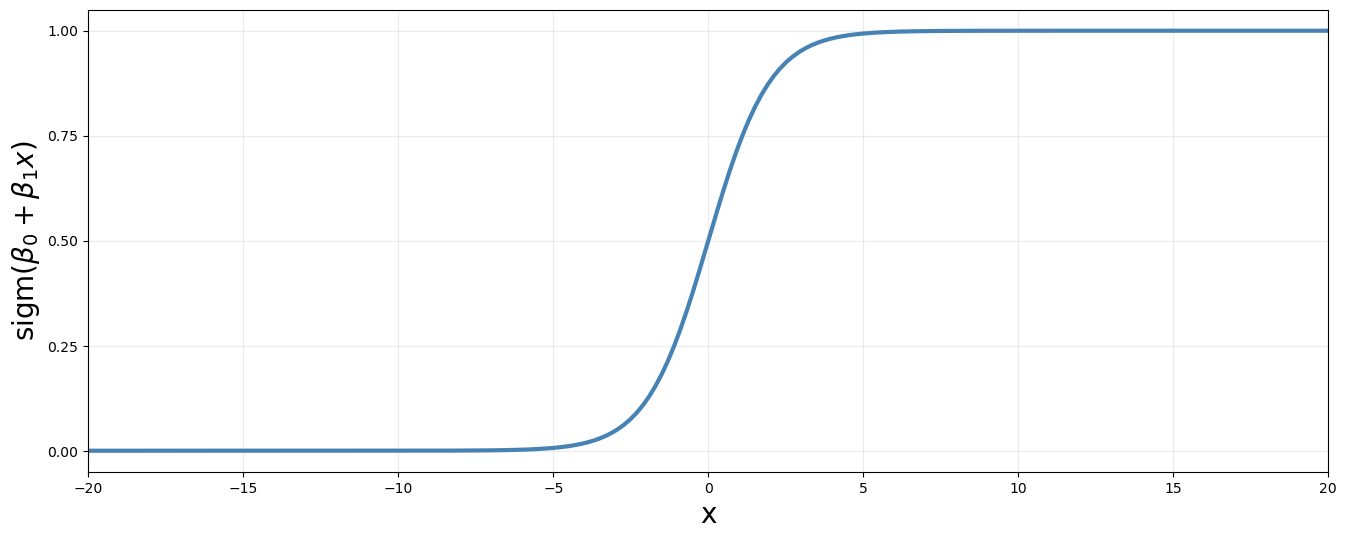

In [9]:
def sigm(z):
    return 1 / (1 + np.exp(-z))

def plot_model(b0, b1):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    
    x = np.linspace(-20,20,200)
    p = sigm(b0 + b1*x)
    
    ax.plot(x, p, color="steelblue", lw=3)
    ax.grid(alpha=0.25)
    ax.set_xlim([-20, 20])
    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel(r"sigm$(\beta_0 + \beta_1 x)$", fontsize=20)
    plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    
plt.show(plot_model(0,1))

&emsp; ***Determining the model parameters***


Now I have the following labeled data relating cancer tumor size to life or death outcome.  Here the feature $x$  represents the size of the tumor in centimeters and the response $y = \{0,1\} = $ {alive, dead}.  

In [ ]:
dfC = pd.DataFrame({"y": np.array([0]*4 + [1]*4) , "x": np.hstack((np.linspace(.5,1.5,4), np.linspace(2.1, 3.1, 4)))})
dfC = dfC.loc[:,["y", "x"]]
dfC.head(8) # Only has 8 samples

,y,x
0,0,0.500000
1,0,0.833333
2,0,1.166667
3,0,1.500000
4,1,2.100000
5,1,2.433333
6,1,2.766667
7,1,3.100000


The following function plots the Logistic Regression model for the given parameters against the data. The task is to find parameters  $(\beta_0 , \beta_1)$ so that the model accurately classifies all points in the dataset.

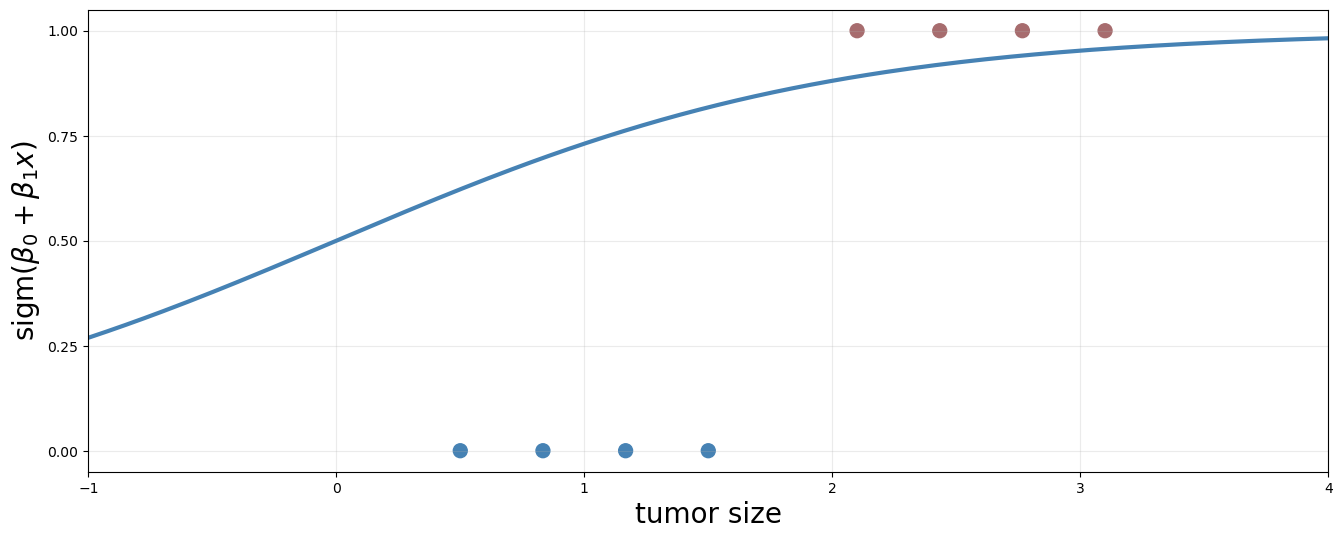

In [17]:
def check_model(df, b0, b1):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    
    x = np.linspace(-1,4,200)
    p = sigm(b0 + b1*x)
    
    ax.plot(x, p, color="steelblue", lw=3)
    ax.grid(alpha=0.25)
    ax.set_xlim([-1, 4])
    ax.set_xlabel("tumor size", fontsize=20)
    ax.set_ylabel(r"sigm$(\beta_0 + \beta_1 x)$", fontsize=20)
    plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    
    x, y = df["x"], df["y"]
    
    colors = ["steelblue" if yval==0 else "#a76c6e" for yval in y]
    ax.scatter(x, y, color=colors, s=100)
    
plt.show(check_model(dfC, 0, 1))

This is not the best fit of all, but there are several methods in Python we can use to determine the parameters in the Logistic Regression model. I'll use the LogisticRegression method that is part of Scikit Learn. The following code fits a Logistic Regression model to the cancer data. 

intercept = -23.080, slope = 12.819


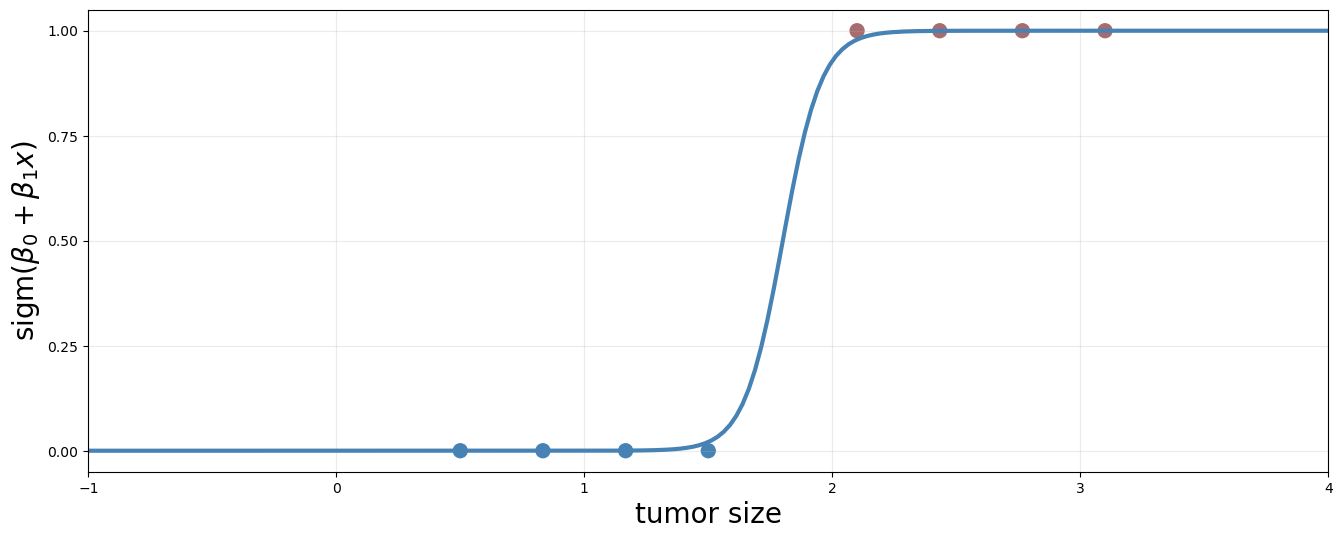

In [24]:
from sklearn.linear_model import LogisticRegression

# Extract response vector and feature matrix from the dataframe. 
# The function expects X to be a matrix, which is why I need to reshape the function.
y, X = dfC["y"], dfC["x"].values.reshape(-1,1)

# Initialize the LogisticRegression method with parameters 
logreg = LogisticRegression(fit_intercept=True, C=1000)

# Fit the model to the data 
logreg.fit(X, y)

# Extract and print the parameters 
b0 = logreg.intercept_[0]
b1 = logreg.coef_[0][0]
print("intercept = {:.3f}, slope = {:.3f}".format(b0, b1))

plt.show(check_model(dfC, b0, b1))


&emsp; ***Interpretation of the output***


The intercept represents the log-odds of death (y=1) when the tumor size is zero and altough not directly interpretable in this context (since tumor size cannot be zero), it adjusts the overall probability curve's position. The slope indicates how strongly the tumor size affects the probability of death. A positive value suggests that as tumor size increases, the likelihood of death also increases.

&emsp; ***Predicting a result***


Suppose we want to use our model to make a prediction about the outcome for a patient with an initial tumor of size $x = 1.95$. Use the learned parameters and the sigmoid function to estimate $p(y=1 \mid x=1.95)$.

In [26]:
# Calculate the log-odds and use the sigmoid function to estimate the probability

x = 1.95
s = 1 / (1 + np.exp(-(b0 + b1 * x)))

print("p( y = 1 | x = 1.95) = {:.5f}".format(s))

p( y = 1 | x = 1.95) = 0.87179


&emsp; ***Probability Calculation in Logistic Regression***

In logistic regression, the model predicts the probability of the positive class (y = 1) by applying the **sigmoid function** to the linear combination of the features. The following commands perform prediction using the sklearn model we've learned. 

logreg.predict(1.95) predicts the class (label) for the input value 1.95, i.e. it tells us to which category this data belongs according to the model


logreg.predict_proba(1.95) returns an array with the probabilities for each class. For example, it could return something like [0.3, 0.7], which would mean 30% probability of belonging to class 0 and 70% probability of belonging to class 1

In [28]:
X = np.array(1.95).reshape(-1, 1)
print(logreg.predict(X))
print(logreg.predict_proba(X))

[1]
[[0.12820898 0.87179102]]
